In [1]:
from scipy.io import wavfile
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

In [52]:
folder = 'File_Path'
os.chdir(folder)

# FFT Of Pre Recorded Data

In [3]:
# Does the fft
def spectrum(t,x):
    frequency = np.fft.rfftfreq(len(t),d=t[1]-t[0])
    amplitude = (np.fft.rfft(x)) 
    return frequency, amplitude

In [4]:
# To cut off frequencies with noise

def steplow(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]<=cut:
            amp[i] = 0
    return amp

def stephigh(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]>=cut:
            amp[i] = 0
    return amp

In [50]:
def spectrum(t,x):
    frequency = np.fft.rfftfreq(len(t),d=t[1]-t[0])
    amplitude = (np.fft.rfft(x)) 
    return frequency, amplitude

def steplow(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]<=cut:
            amp[i] = 0
    return amp

def stephigh(cut,freq,amp):
    for i in range(len(amp)):
        if freq[i]>=cut:
            amp[i] = 0
    return amp

def fftplot(filename,stdev=3,fast = True,zoom = None,cutlow=0,cuthigh=40,enlarge=False,cube=False,plot=True):
    fs, data = wavfile.read(str(filename))
#   Defining time domain and taking the FFT
    df = fs/len(data) # = 1/T
    if fast == True:
        nfft = (2**14)
    else:
        nfft = len(data)
    data = data[0:nfft]
    t = np.linspace(0,len(data)/fs,len(data))
    freq, amp = spectrum(t,data)
    cutamp = steplow(cutlow,freq,amp)
    cutamp = stephigh(cuthigh,freq,amp)
    
    
    Y = np.fft.irfft(amp)
    
    if cube:
        Y=Y**3
        
    if zoom == None:
        t1 = t
    else:
        cutfreq = freq[0:zoom]
        cutamp = amp[0:zoom]
        t1 = t[0:zoom]

    cutamp = np.abs(cutamp)**2
    
    # Fitting a Gaussian
    wid = 2*(stdev**2)
    wid1  = 100
    cen = freq[np.argmax(cutamp)]
    g = cutamp*np.exp(-((cutfreq - cen)**2)/wid)
    G = np.exp(-(cutfreq - cen)**2/wid)
    G_all = amp*np.exp(-((freq - cen)**2)/wid)
    
    YY = np.fft.irfft(G_all)
    
#   Plotting the waveform and the correspondng FFT   
    if plot:
        fig, ax = plt.subplots(8,1,figsize=(25,30))
        if enlarge == True:
            top = 3
            bottom = 1.5
        else:
            top = 1.5
            bottom = 1.4
        fig.subplots_adjust(top=top,bottom=bottom)
        fig.tight_layout(pad=4.0)
        
        ax[0].plot(t,data)
        ax[0].set_xlabel('Time (s)',fontsize=15)
        ax[0].set_ylabel('Amplitude',fontsize=15)
        ax[0].set_title('Wave',fontsize=20)
        ax[0].tick_params(axis='both',labelsize=13)
        
        ax[1].plot(cutfreq,cutamp)
        ax[1].set_ylabel('Amplitude',fontsize=15)
        ax[1].set_xlabel('Frequency (Hz)',fontsize=15)
        ax[1].set_title('FFT with Bandpass',fontsize=20)
        ax[1].tick_params(axis='both',labelsize=13)
        
        ax[2].plot(t[0:len(Y[20000:-10000])],Y[20000:-10000])
        ax[2].set_xlabel('Time (s)',fontsize=15)
        ax[2].set_ylabel('Amplitude',fontsize=15)
        ax[2].set_title('IFFT Bandpass',fontsize=20)
        ax[2].tick_params(axis='both',labelsize=13)
        
        ax[3].plot(cutfreq,G)
        ax[3].set_ylabel('Amplitude',fontsize=20)
        ax[3].set_xlabel('Time domain (s)',fontsize=15)
        ax[3].set_title('Gaussian Distribution',fontsize=20)
        ax[3].tick_params(axis='both',labelsize=13)

        ax[4].plot(cutfreq,g)
        ax[4].set_ylabel('Amplitude',fontsize=15)
        ax[4].set_xlabel('Frequency (Hz)',fontsize=15)
        ax[4].set_title('Fourier Transform With Gaussian fit',fontsize=20)
        ax[4].tick_params(axis='both',labelsize=13)

        ax[5].plot(t[0:len(YY)],YY)
        ax[5].set_xlabel('Time (s)',fontsize=15)
        ax[5].set_ylabel('Amplitude',fontsize=15)
        ax[5].set_title('Wave produced from Inverse FFT after Gaussian',fontsize=20)
        ax[5].tick_params(axis='both',labelsize=13)

        ax[6].plot(t[0:len(YY)],YY,t,data)
        ax[6].set_xlabel('Time (s)',fontsize=15)
        ax[6].set_ylabel('Amplitude',fontsize=15)
        ax[6].set_title('Wave data and data-smoothed wave',fontsize=20)
        ax[6].tick_params(axis='both',labelsize=13)

        ax[7].plot(cutfreq[0:len(g)],cutamp[0:len(g)],cutfreq[0:len(g)],g)
        ax[7].set_ylabel('Amplitude',fontsize=15)
        ax[7].set_xlabel('Frequency (Hz)',fontsize=15)
        ax[7].set_title('Fourier Transform compared to noise reduced from gaussian '+str(cuthigh)+' Hz stripped off',fontsize=20)
        ax[7].tick_params(axis='both',labelsize=13)
        
    return print("Peak Frequency at", freq[np.argmax(amp)])

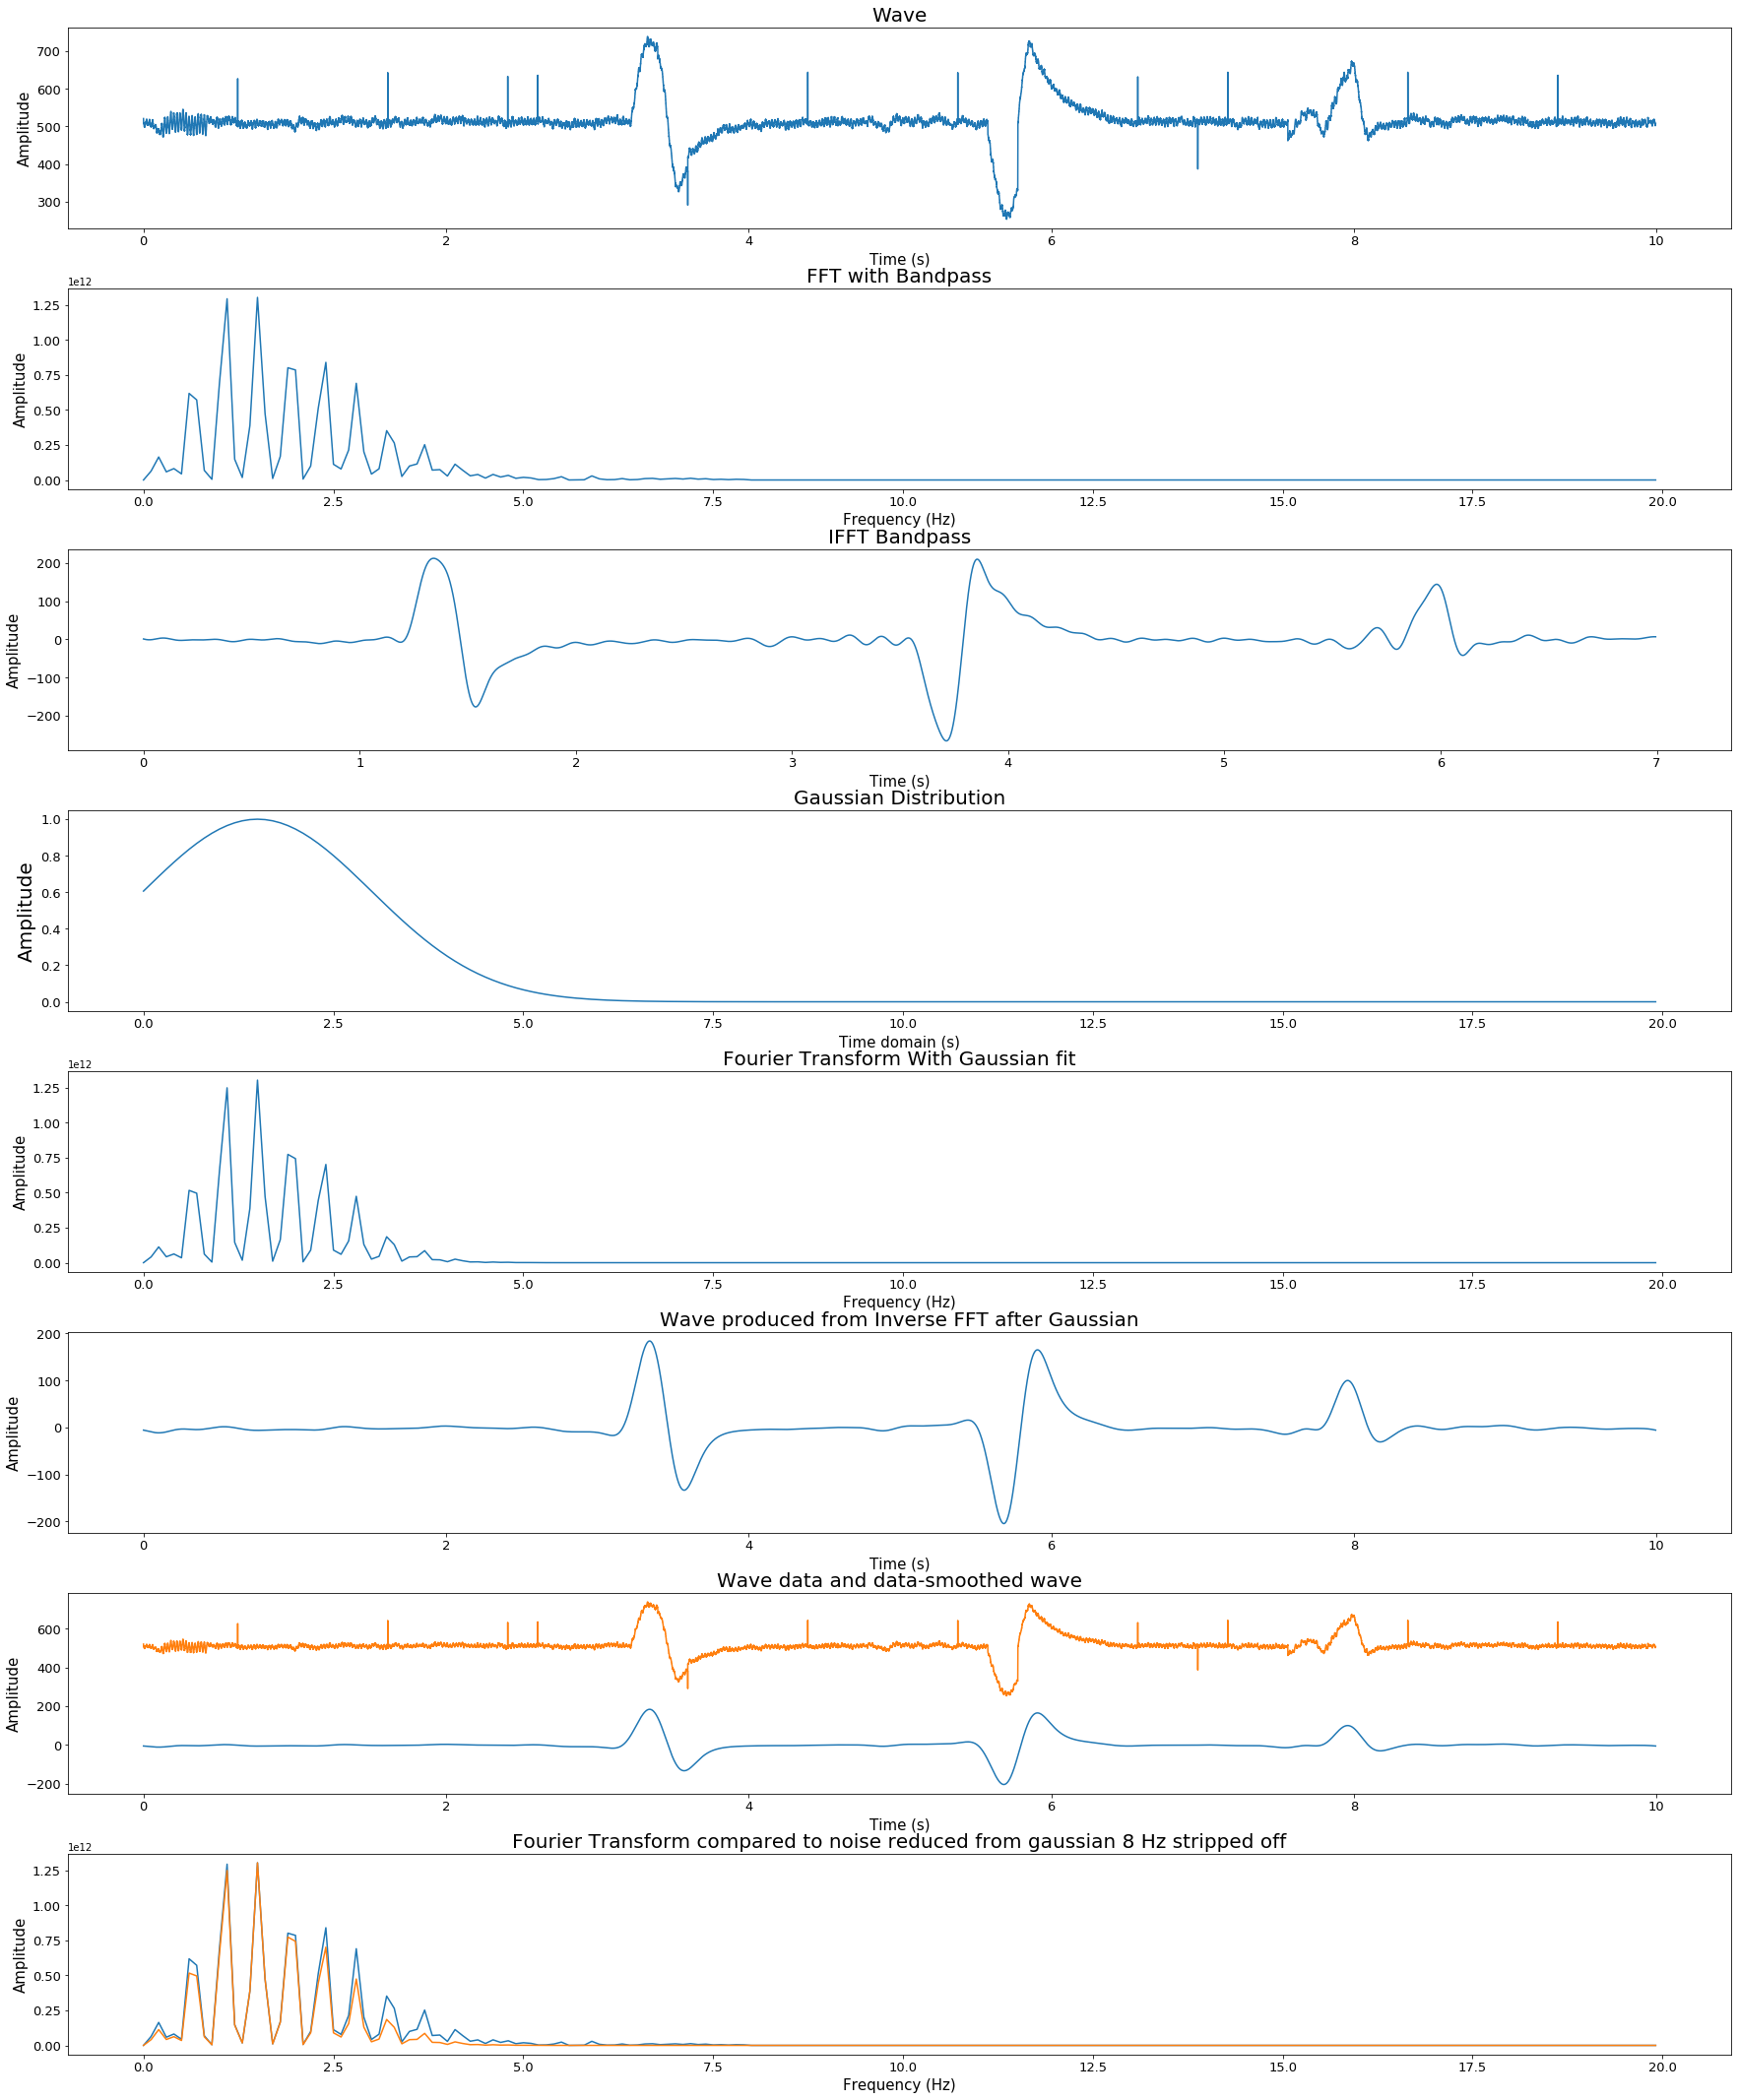

In [51]:
fftplot('2020-05-24_1_Raw.wav',stdev=1.5,zoom=200,plot=True,cuthigh=8,cube=False,fast=False,enlarge=True)